In [1]:
from rdkit.Chem import MolFromSmiles

from utils.data_preparation import *
from utils.data_exploration import *

from rdkit import Chem

import pandas as pd

task = 'CYP2C19'

# Molecule Normalization

<span style="color:cyan">Original molecule from TDC</span> \
<span style="color:cyan">Normalized molecule (normalization + fragment remover)</span> 

COCCCNCCCCOc1c(Cl)cc(C)cc1Br.O=C(O)C(=O)O \
COCCCNCCCCOc1c(Cl)cc(C)cc1Br

CC(C)NCCCOc1ccc(Cl)cc1Br.O=C(O)C(=O)O \
CC(C)NCCCOc1ccc(Cl)cc1Br

CCOc1ccc2nc(C)cc(Nc3ccc4c(c3)OCCO4)c2c1.Cl \
CCOc1ccc2nc(C)cc(Nc3ccc4c(c3)OCCO4)c2c1

CCC(=S)/C=C1\Sc2ccccc2N1CCCS(=O)(=O)[O-].[Na+] \
CCC(=S)/C=C1\Sc2ccccc2N1CCCS(=O)(=O)[O-]

CCOc1cc(CNCCc2ccc(S(N)(=O)=O)cc2)cc(Cl)c1OCc1ccccc1.Cl \
CCOc1cc(CNCCc2ccc(S(N)(=O)=O)cc2)cc(Cl)c1OCc1ccccc1

CN1CCC[C@@H]1c1cccnc1.O=C(O)[C@@H](O)[C@@H](O)C(=O)O.O=C(O)[C@@H](O)[C@@H](O)C(=O)O \
CN1CCC[C@@H]1c1cccnc1


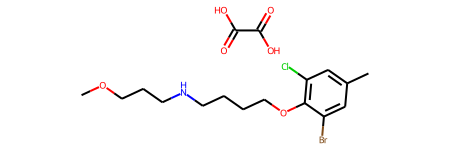

In [9]:
MolFromSmiles("COCCCNCCCCOc1c(Cl)cc(C)cc1Br.O=C(O)C(=O)O")

Original molecule from TDC


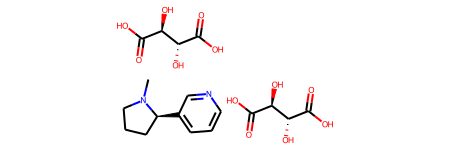

In [10]:
print("Original molecule from TDC")
MolFromSmiles("CN1CCC[C@@H]1c1cccnc1.O=C(O)[C@@H](O)[C@@H](O)C(=O)O.O=C(O)[C@@H](O)[C@@H](O)C(=O)O")

Normalized molecule


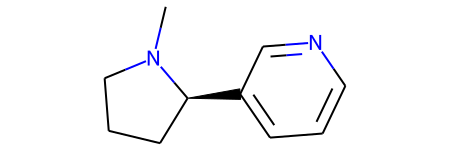

In [11]:
print("Normalized molecule")
MolFromSmiles("CN1CCC[C@@H]1c1cccnc1")

# Small Molecules

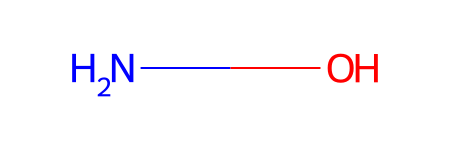

In [2]:
MolFromSmiles("NO")

In [3]:
data = data_preprocessing(task)
data = remove_small_molecules(data)
# extract_null(data)

Dataset already exists, returning data/cyp2c19/raw_dataset.csv.
3765     OCCCSCCO
4313       CCCCNN
4416     NCC(O)CN
5075    NNC(NN)NN
5489      CC(N)=O
5501       N#CCCN
5507    NOCC(=O)O
5546    CC(=O)NBr
5665    CCSC(=N)N
5711     NC(=O)NO
5715           NO
5755        [Cl-]
5785     CSC(=N)N
5799         NCCS
5846            N
5856       NCCCCN
5900     NNC(N)=O
6040       N#[O+]
6766    NCCC(=O)O
6767    NCCS(=O)O
6772     NCC(=O)O
6994    Nc1ccncc1
7321        NNNNN
Removing the following molecules: 
Series([], )


- molecular weight < 200, < 5 atoms [Official rule for drug-likeness, rule of 5] 

# Why do we remove metals?

- Metals are never parts of drugs (in general)
- very few anti-cancer drugs 

# Is it more important to get all positive molecules (CYP inhibtions) or do we simply want a high accuracy?

- balanced acc
- confusion matrix